<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/ML_LogReg_Model_Predict_TurnoverOccured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
tor = pd.read_csv("/content/turnover.csv",encoding="ISO-8859-1")
tor
# we use encode beacuse there is issue in textul data while decoding it (means it might have unicodes --> western europen chr) -->
# to cover them -> We use ISO-8859-1 the data will store in it..

stag  event gender   age         industry  profession  \
0       7.030801      1      m  35.0            Banks          HR   
1      22.965092      1      m  33.0            Banks          HR   
2      15.934292      1      f  35.0  PowerGeneration          HR   
3      15.934292      1      f  35.0  PowerGeneration          HR   
4       8.410678      1      m  32.0           Retail  Commercial   
...          ...    ...    ...   ...              ...         ...   
1124   10.611910      0      f  41.0            Banks          HR   
1125   10.611910      0      f  41.0            Banks          HR   
1126  118.800821      0      f  34.0          Telecom  Accounting   
1127   49.412731      0      f  51.0          Consult          HR   
1128   24.837782      0      f  29.0           Retail          HR   

          traffic    coach head_gender greywage  way  extraversion  independ  \
0     rabrecNErab       no           f    white  bus           6.2       4.1   
1           empjs       no           m    white  bus           6.2       4.1   
2     rabrecNErab       no           m    white  bus           6.2       6.2   
3     rabrecNErab       no           m    white  bus           5.4       7.6   
4           youjs      yes           f    white  bus           3.0       4.1   
...           ...      ...         ...      ...  ...           ...       ...   
1124  rabrecNErab  my head           m    white  bus           8.6       3.4   
1125  rabrecNErab  my head           m    white  bus           8.6       3.4   
1126           KA       no           f    white  bus           4.6       5.5   
1127        empjs       no           m     grey  bus           3.8       7.6   
1128        youjs       no           f    white  car           9.4       1.2   

      selfcontrol  anxiety  novator  
0             5.7      7.1      8.3  
1             5.7      7.1      8.3  
2             2.6      4.8      8.3  
3             4.9      2.5      6.7  
4             8.0      7.1      3.7  
...           ...      ...      ...  
1124          2.6      4.8      8.3  
1125          2.6      4.8      8.3  
1126          7.2      6.3      3.7  
1127          5.7      6.3      5.2  
1128          4.1      5.6      6.7  

[1129 rows x 16 columns]

In [9]:
tor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [10]:
tor.isnull().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [11]:
tor.describe()

stag        event          age  extraversion     independ  \
count  1129.000000  1129.000000  1129.000000   1129.000000  1129.000000   
mean     36.627526     0.505757    31.066965      5.592383     5.478034   
std      34.096597     0.500188     6.996147      1.851637     1.703312   
min       0.394251     0.000000    18.000000      1.000000     1.000000   
25%      11.728953     0.000000    26.000000      4.600000     4.100000   
50%      24.344969     1.000000    30.000000      5.400000     5.500000   
75%      51.318275     1.000000    36.000000      7.000000     6.900000   
max     179.449692     1.000000    58.000000     10.000000    10.000000   

       selfcontrol      anxiety      novator  
count  1129.000000  1129.000000  1129.000000  
mean      5.597254     5.665633     5.879628  
std       1.980101     1.709176     1.904016  
min       1.000000     1.700000     1.000000  
25%       4.100000     4.800000     4.400000  
50%       5.700000     5.600000     6.000000  
75%       7.200000     7.100000     7.500000  
max      10.000000    10.000000    10.000000

In [13]:
tor.duplicated().sum()

13

In [3]:
tor = tor.drop_duplicates()

In [17]:
tor.head()

stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      7.1      8.3  
2      4.8      8.3  
3      2.5      6.7  
4      7.1      3.7

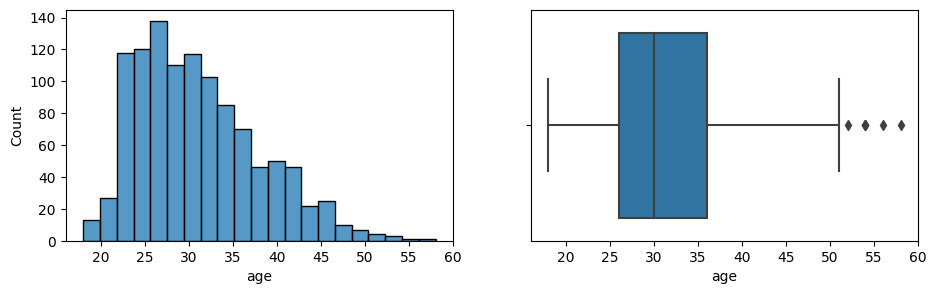

In [31]:
plt.figure(figsize=(11,3))
plt.subplot(121)
sns.histplot(data=tor,x="age",bins="auto")
plt.subplot(122)
sns.boxplot(data=tor,x="age")
plt.show()

In [32]:
tor.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

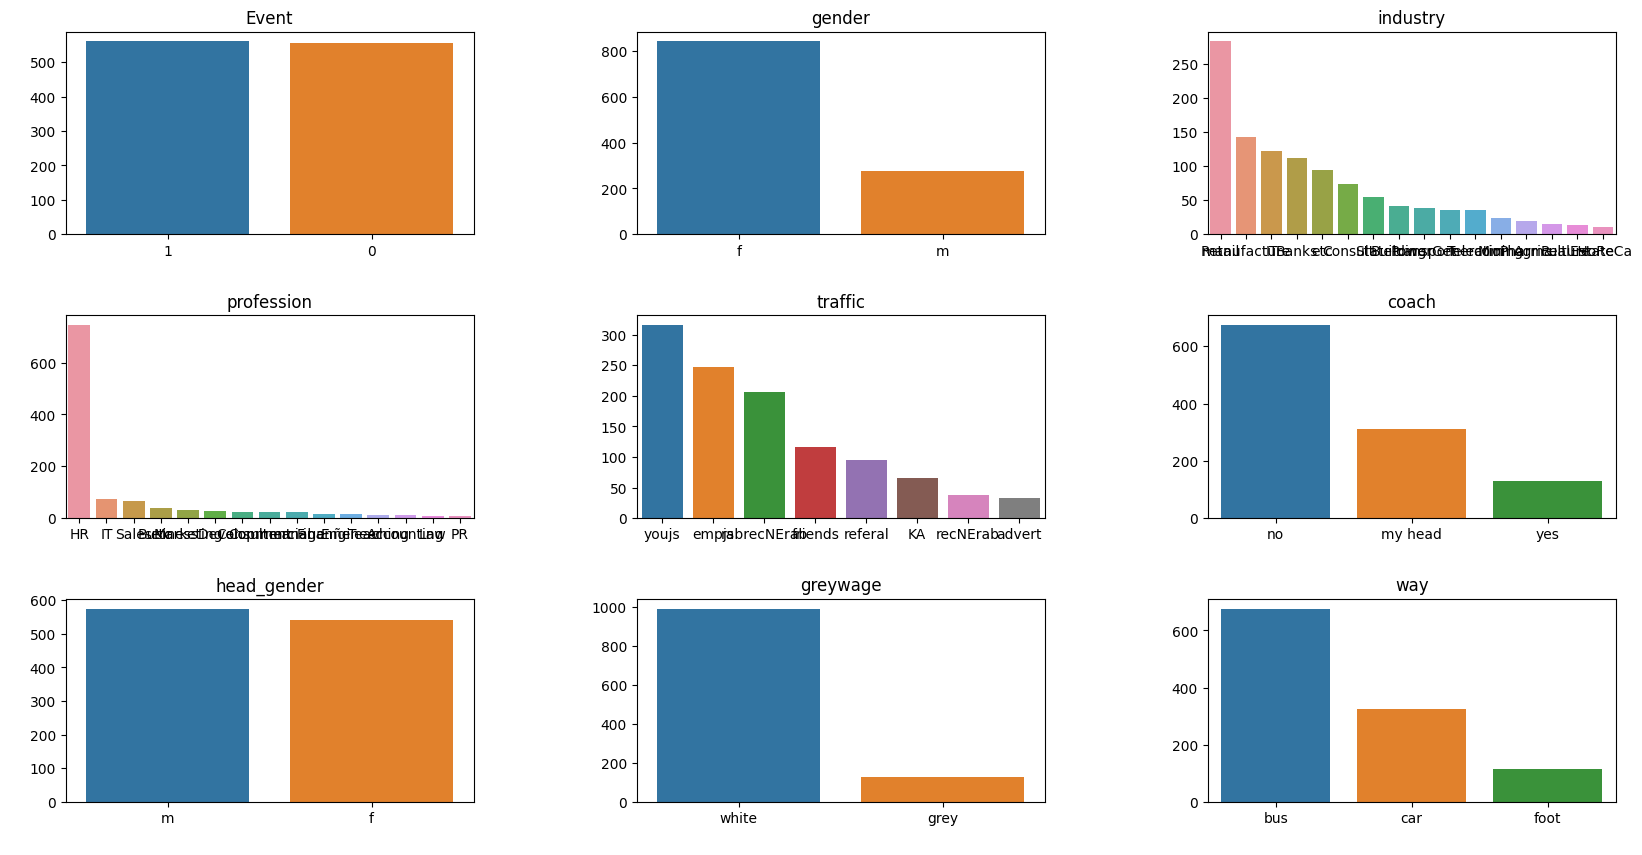

In [58]:
figure,axis = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
plt.subplots_adjust(hspace = 0.4, wspace=0.4)

g = sns.countplot(data=tor,x="event",ax=axis[0,0],order = tor['event'].value_counts().index)
g.title.set_text("Event")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="gender",ax=axis[0,1],order = tor['gender'].value_counts().index)
g.title.set_text("gender")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="industry",ax=axis[0,2],order = tor['industry'].value_counts().index)
g.title.set_text("industry")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="profession",ax=axis[1,0],order = tor['profession'].value_counts().index)
g.title.set_text("profession")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="traffic",ax=axis[1,1],order = tor['traffic'].value_counts().index)
g.title.set_text("traffic")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="coach",ax=axis[1,2],order = tor['coach'].value_counts().index)
g.title.set_text("coach")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="head_gender",ax=axis[2,0],order = tor['head_gender'].value_counts().index)
g.title.set_text("head_gender")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="greywage",ax=axis[2,1],order = tor['greywage'].value_counts().index)
g.title.set_text("greywage")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="way",ax=axis[2,2],order = tor['way'].value_counts().index)
g.title.set_text("way")
g.set(xlabel=" ")
g.set(ylabel=" ")

plt.show()

In [7]:
plot_col = tor[['event', 'gender','industry', 'profession', 'traffic','coach', 'head_gender', 'greywage', 'way']]

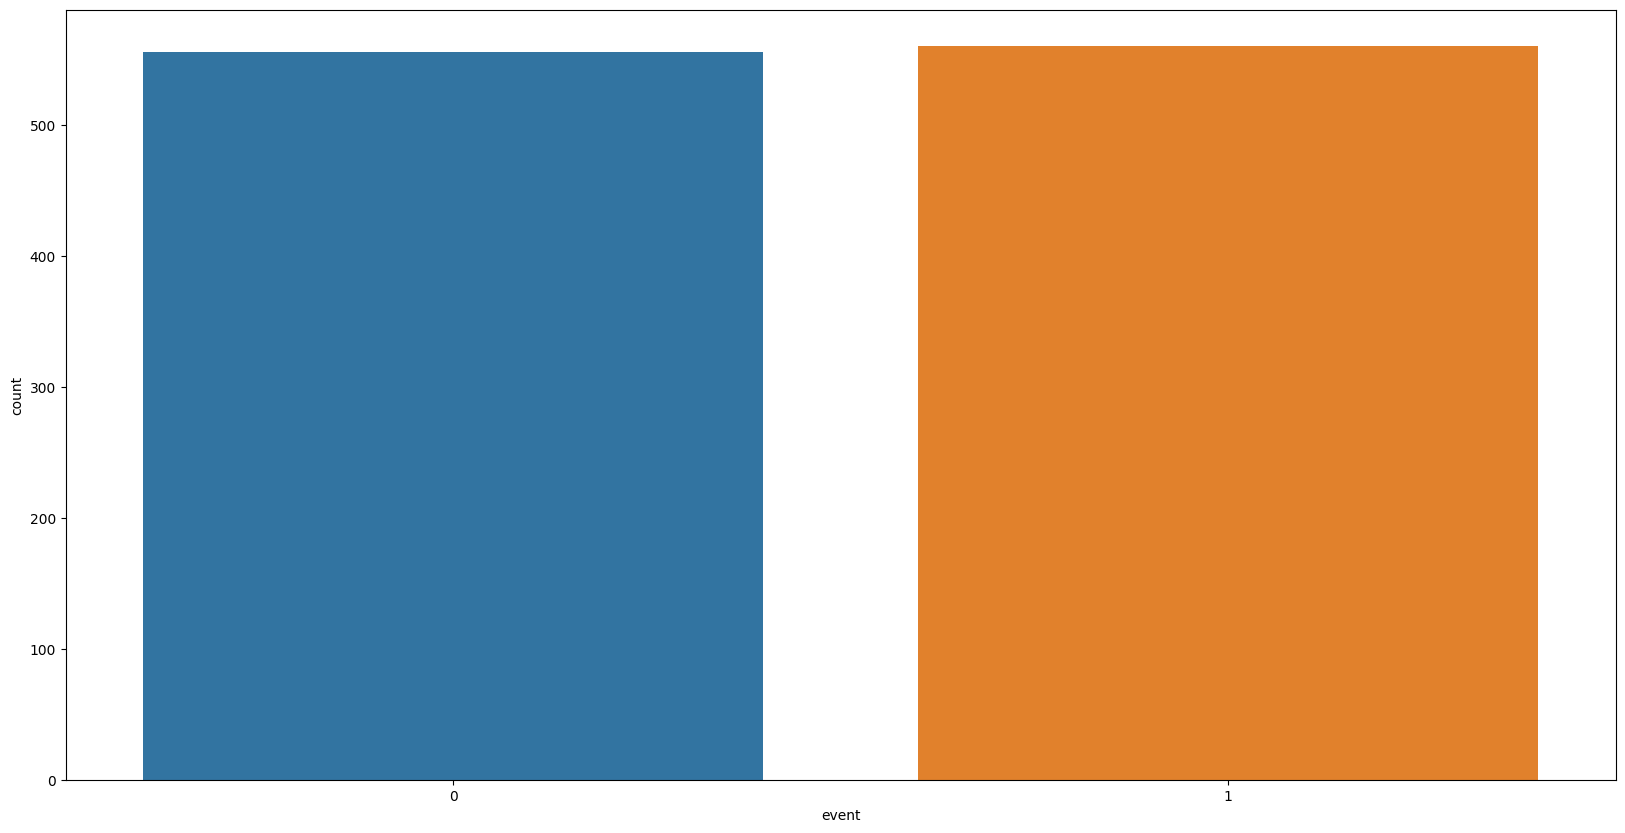

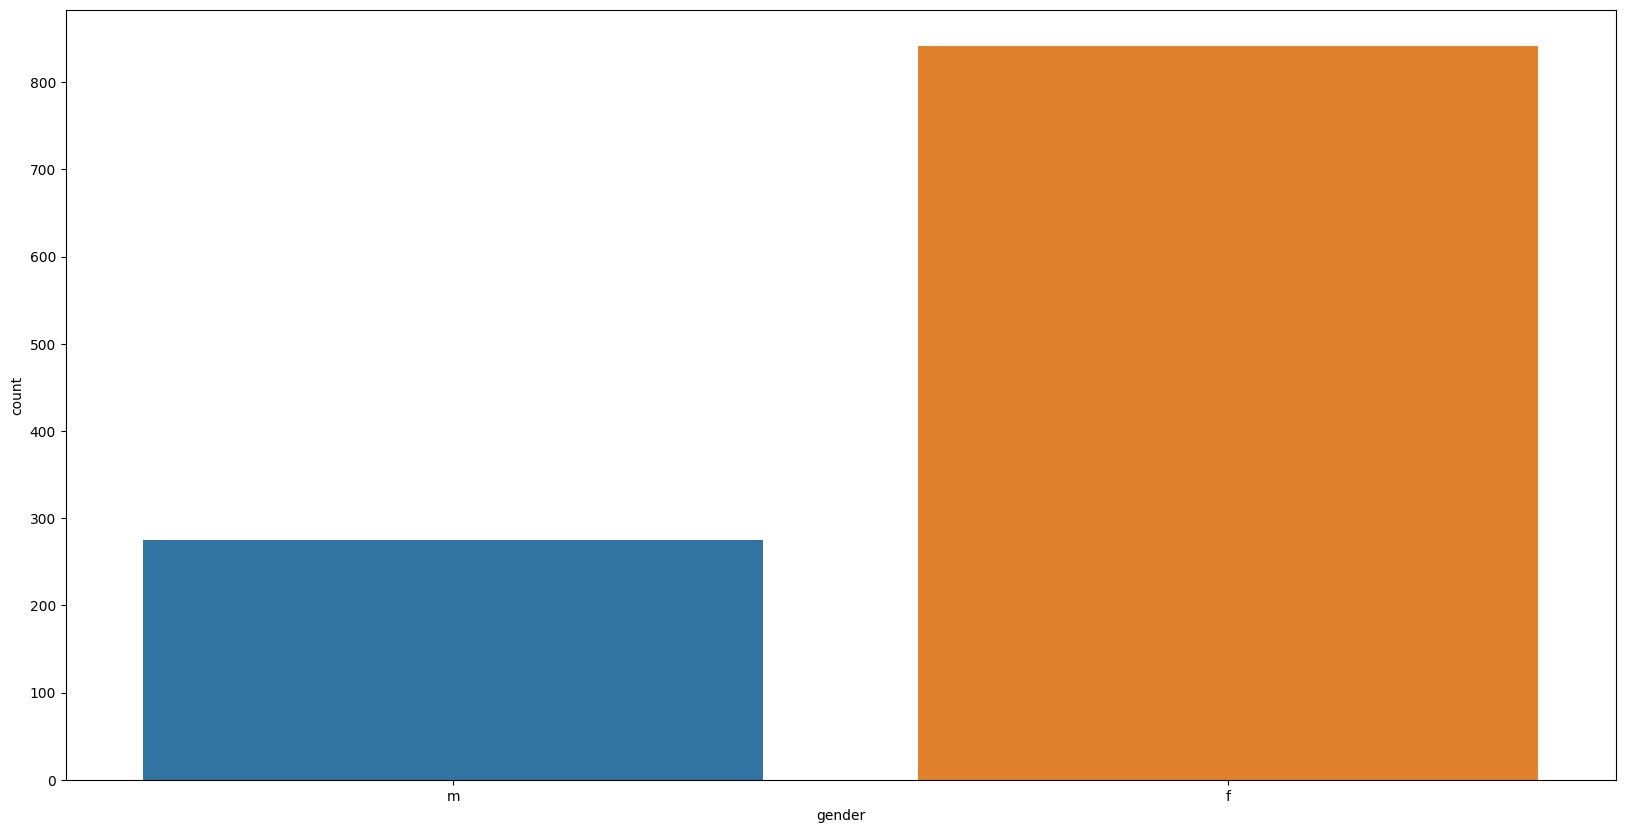

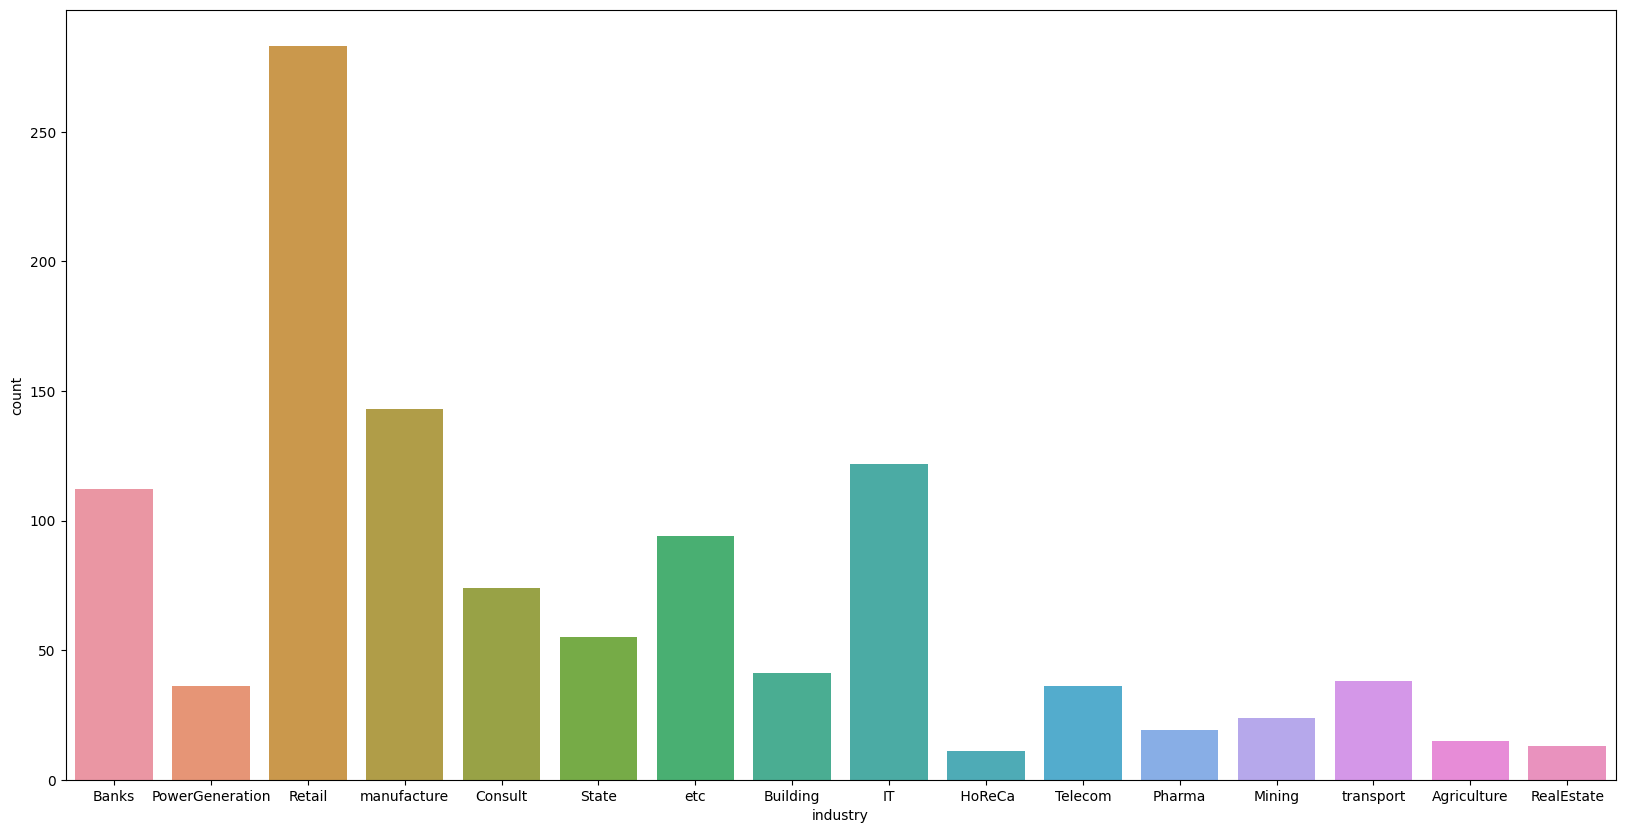

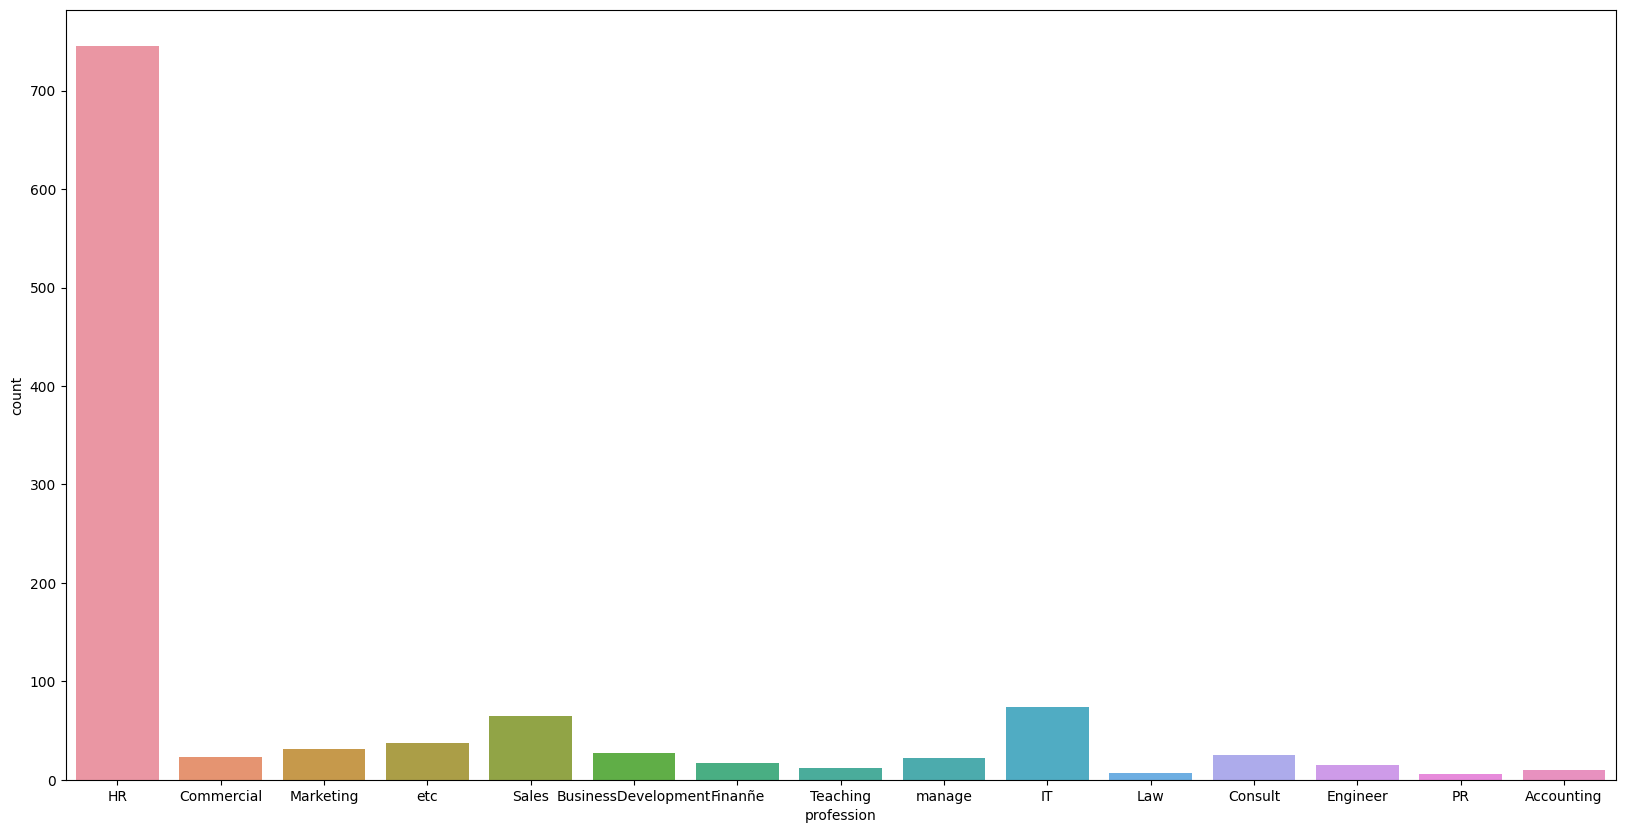

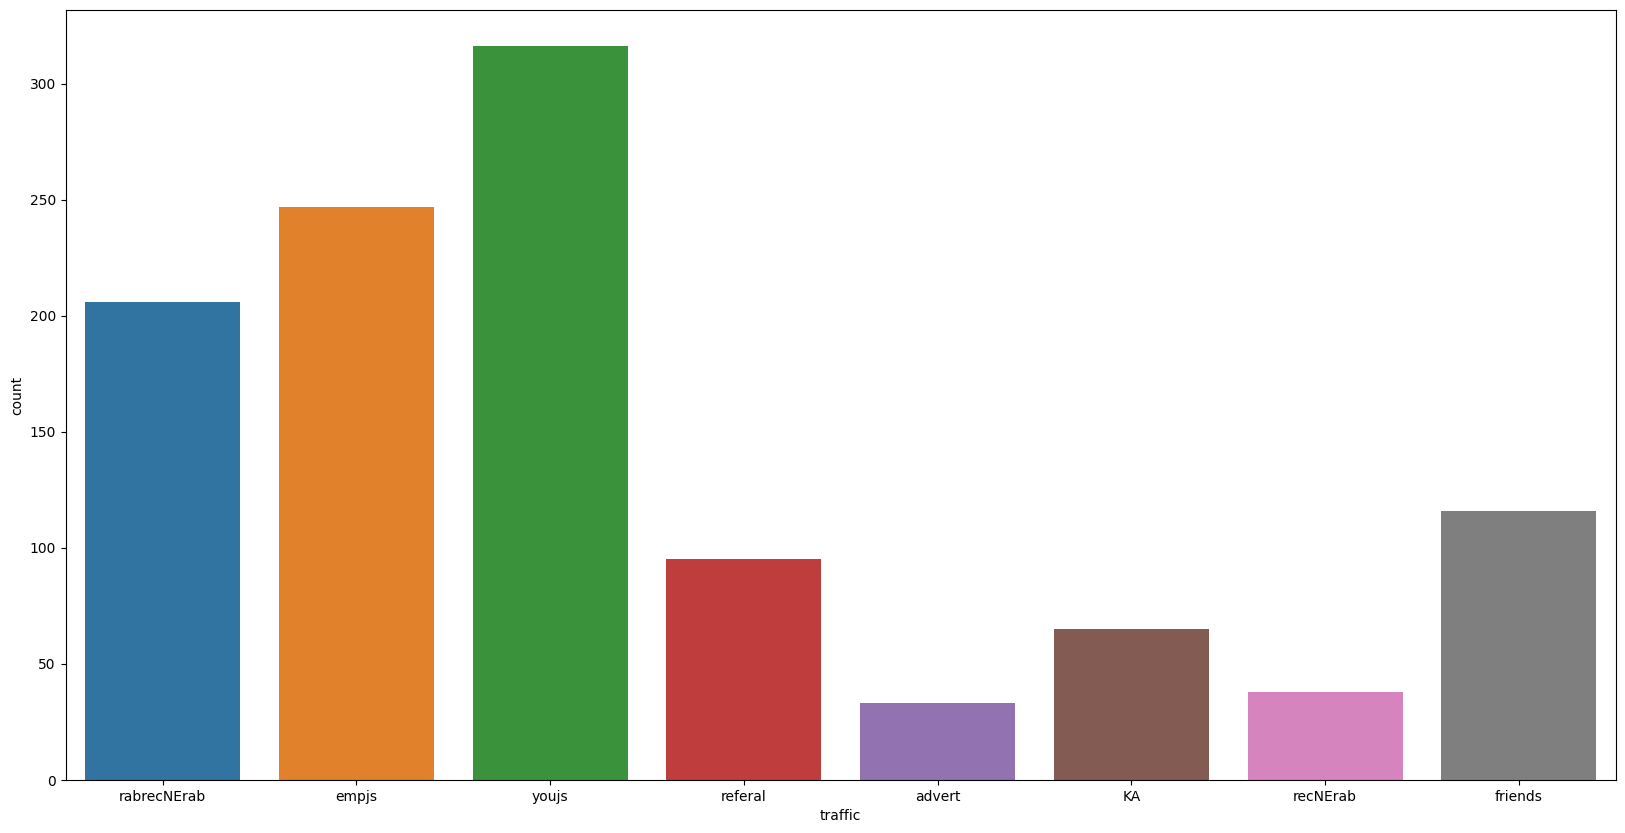

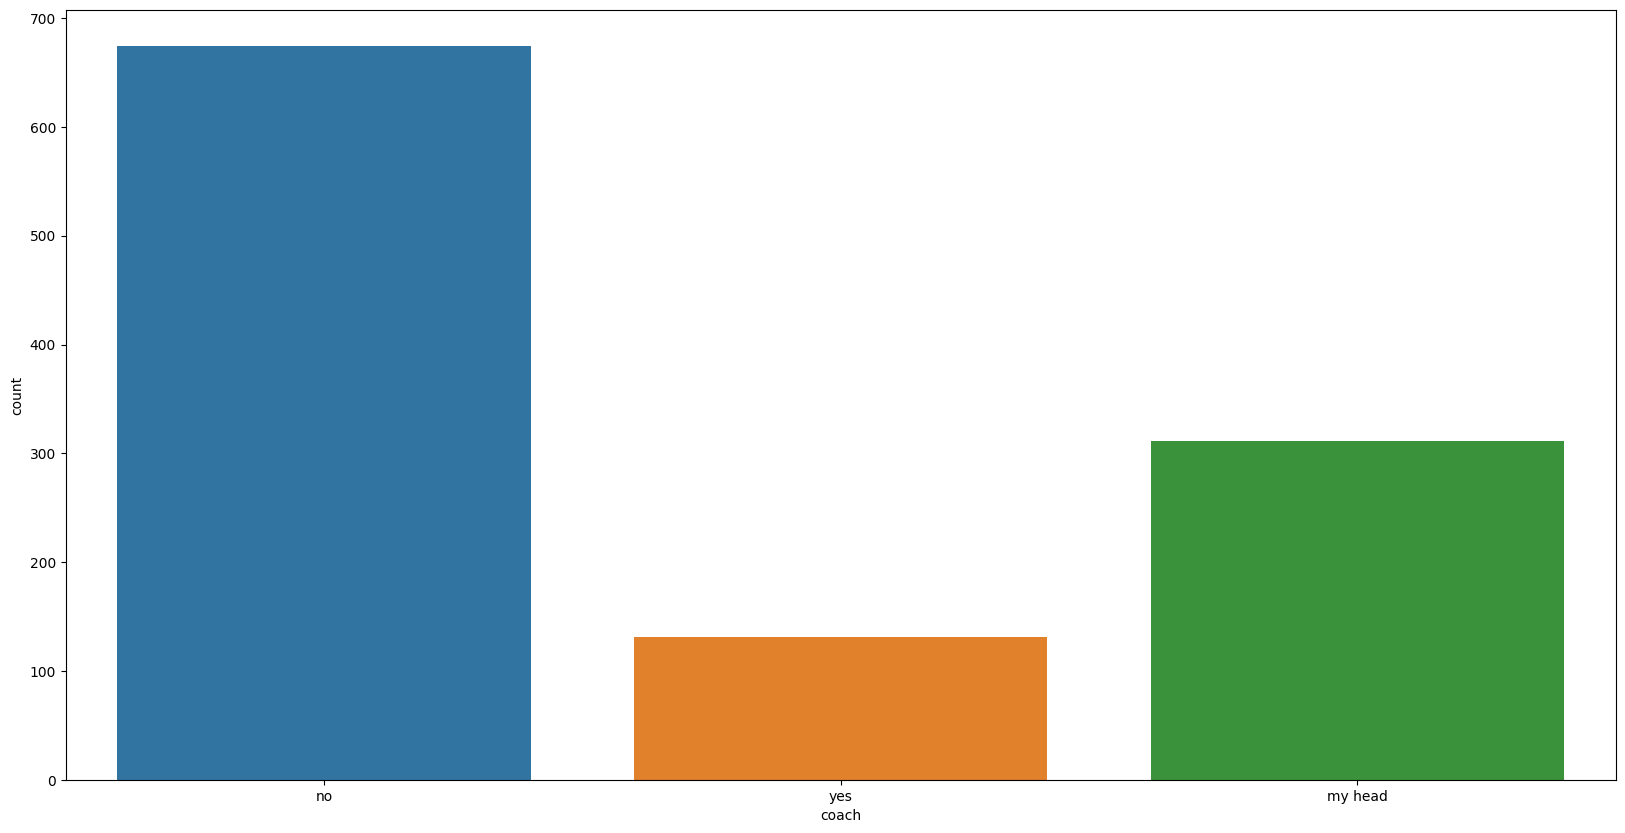

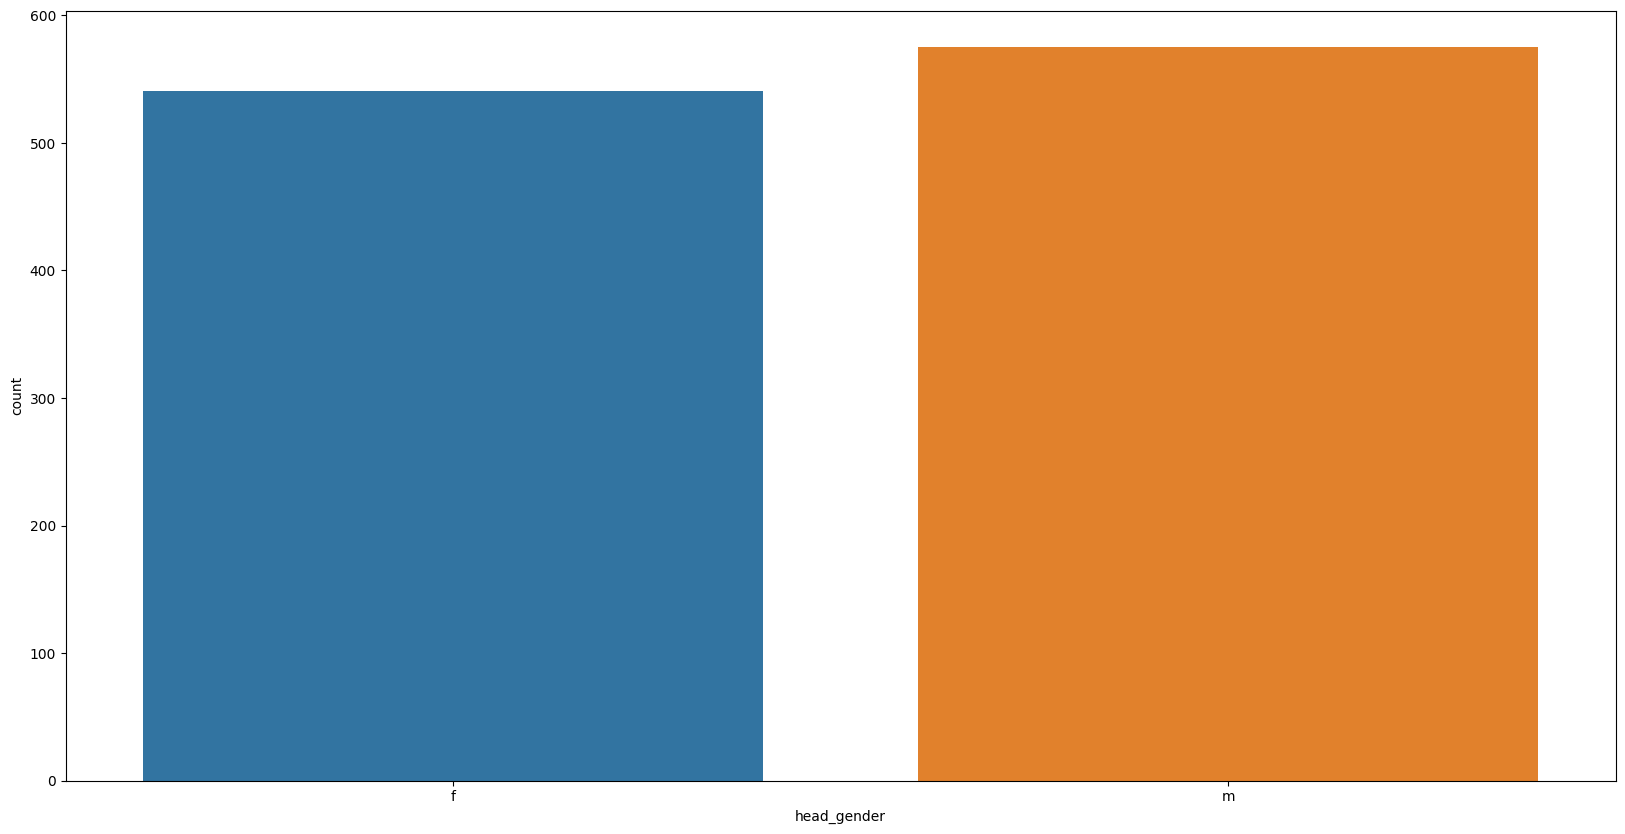

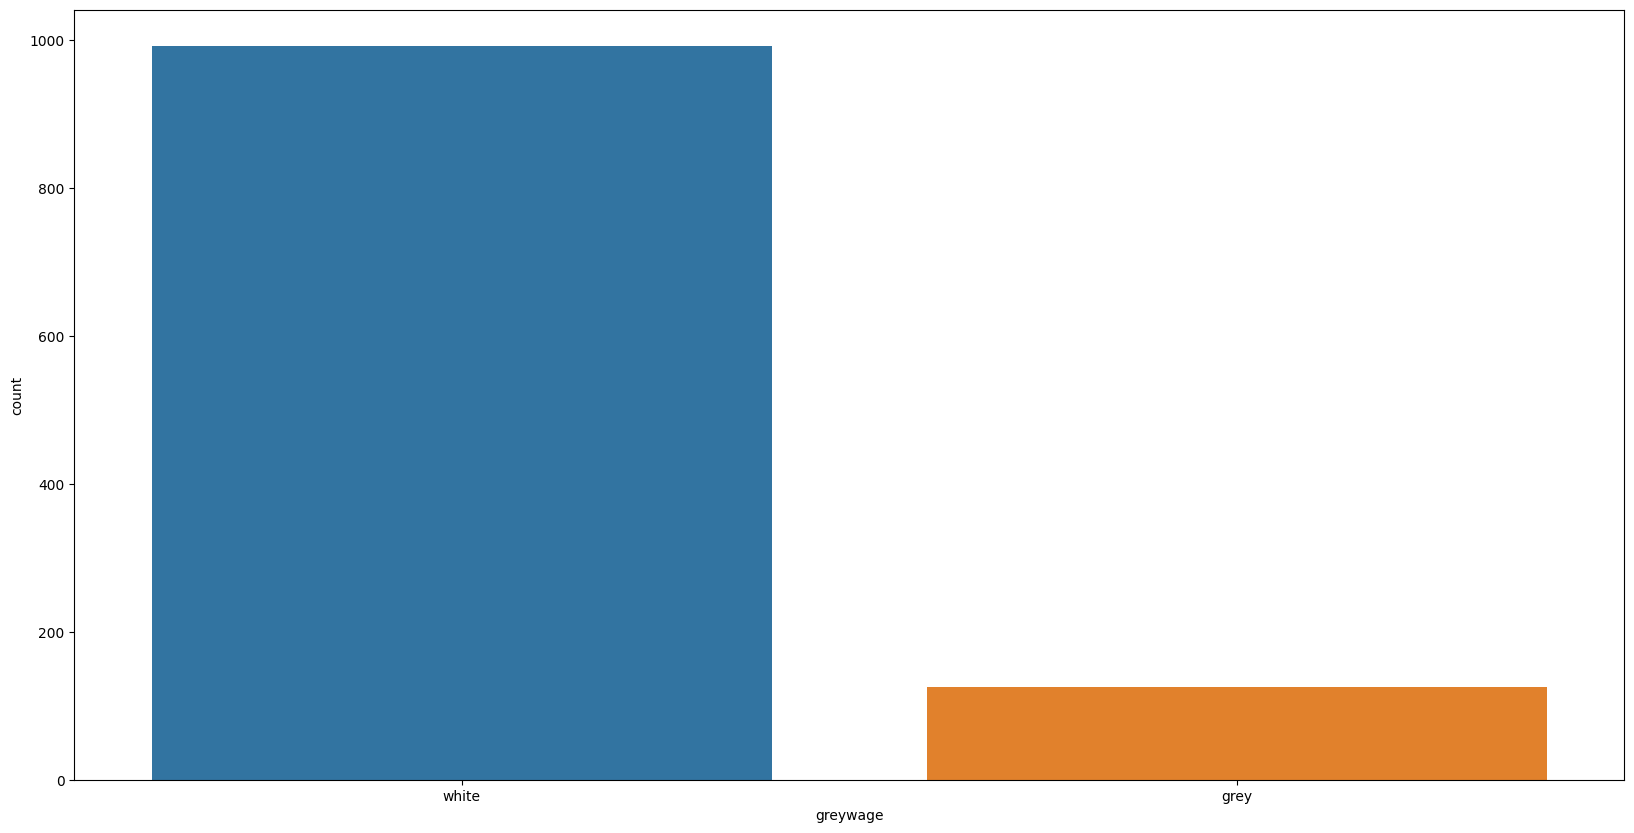

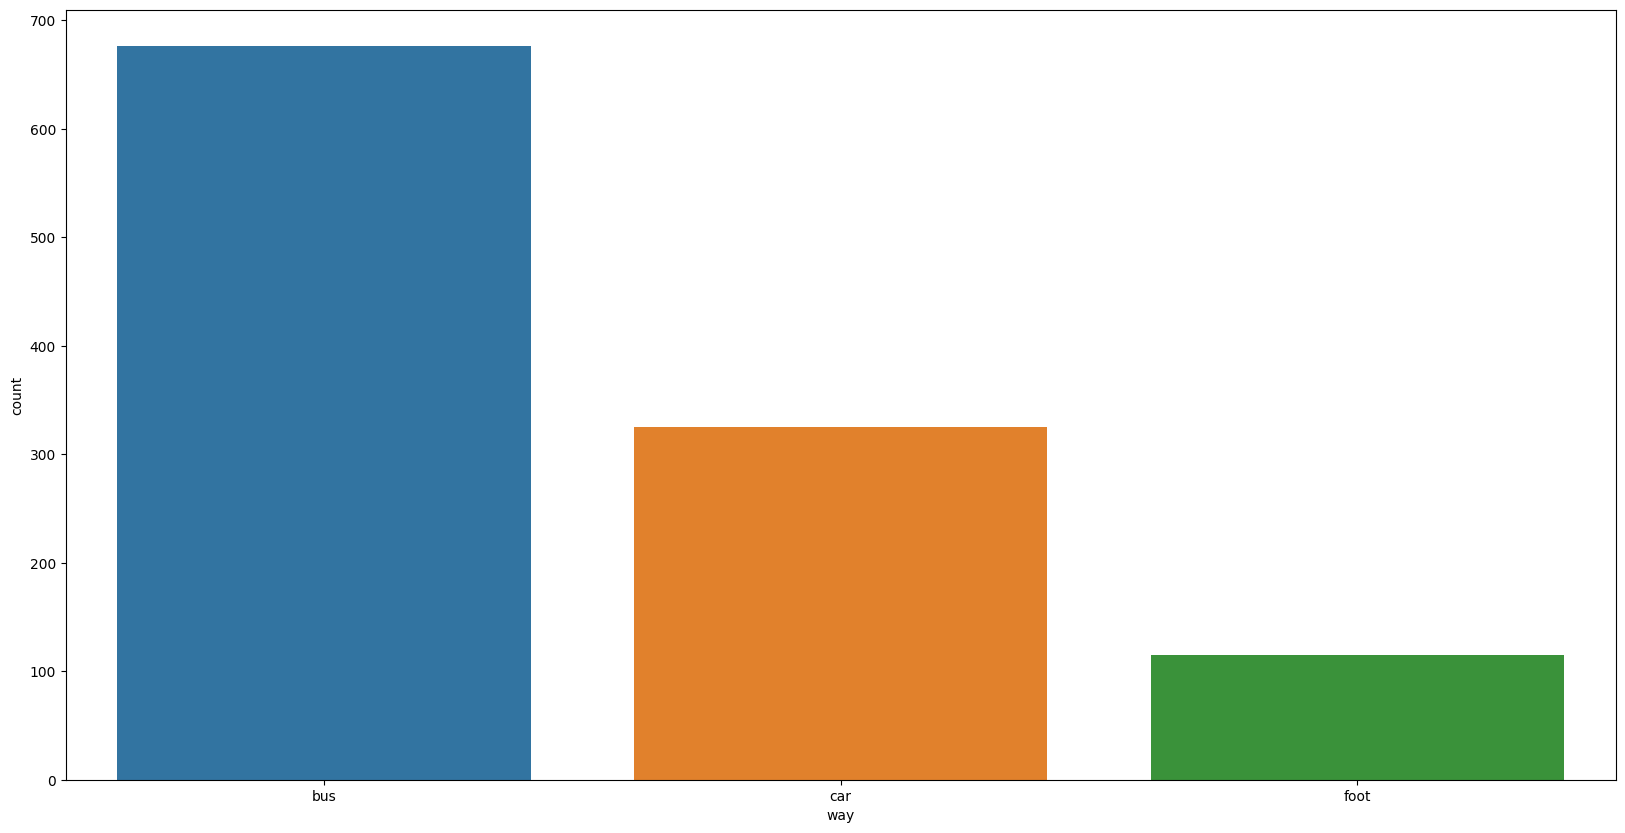

In [52]:
# We can do by this way if we wants one plot in on row with methods:
for i in plot_col.columns:
  plt.figure(figsize=(20,10))
  sns.countplot(data=plot_col,x=i)
  plt.show()

In [61]:
def hist_box_plots(data,col,bins="auto"):
  fig,axis = plt.subplots(ncols=2,figure=(11,3))
  sns.hisplot(data=data,x=col,ax=axis[0],bins=bins)
  sns.boxplot(data=data,x=col,ax=axis[1])

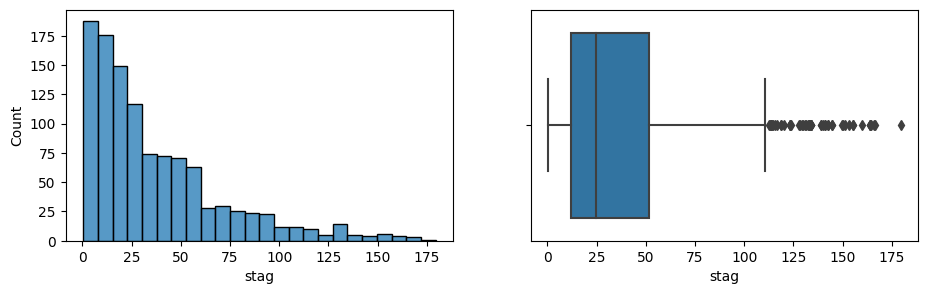

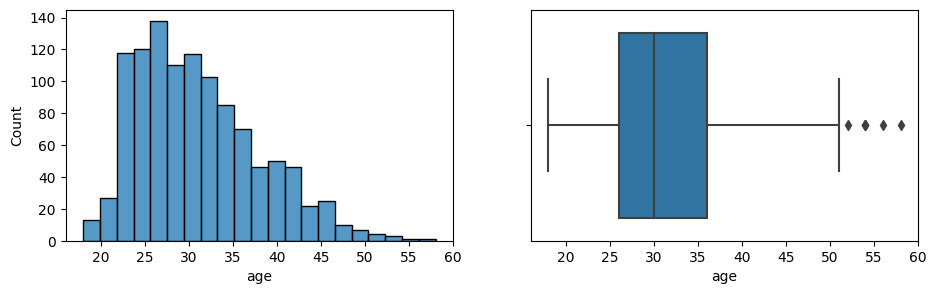

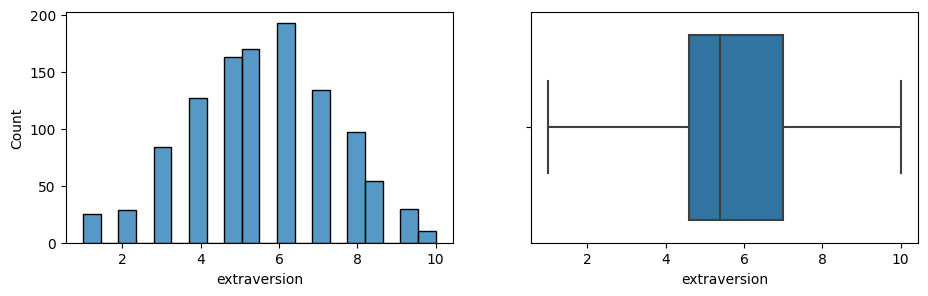

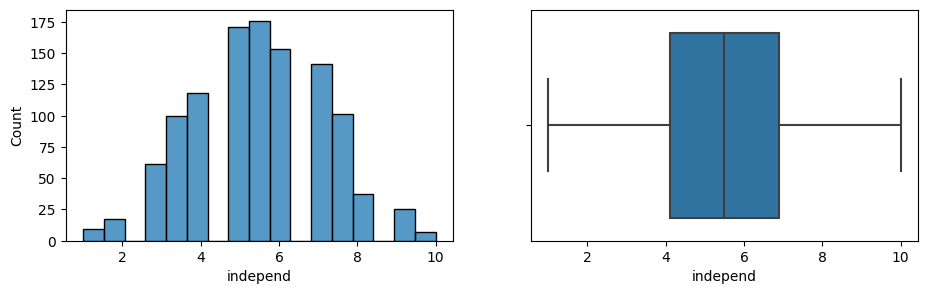

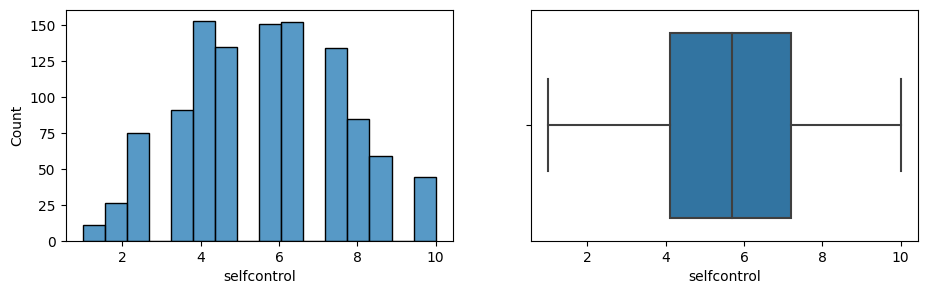

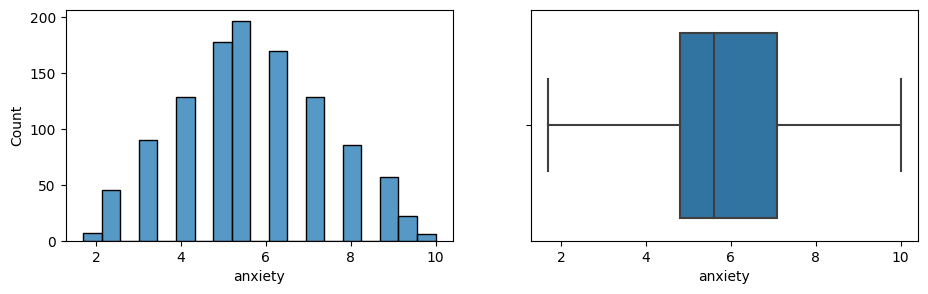

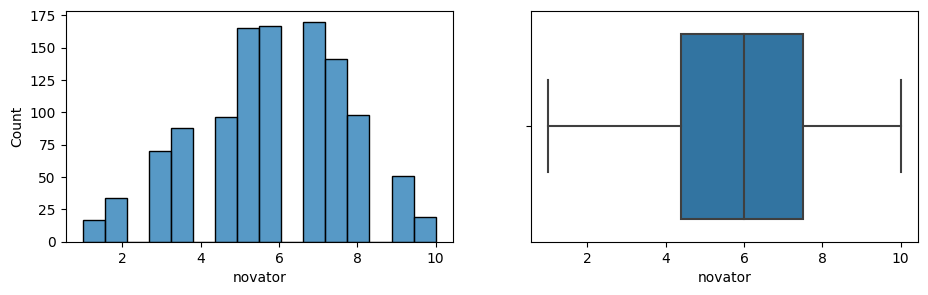

In [62]:
for col in ['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']:
  hist_box_plots(tor,col)

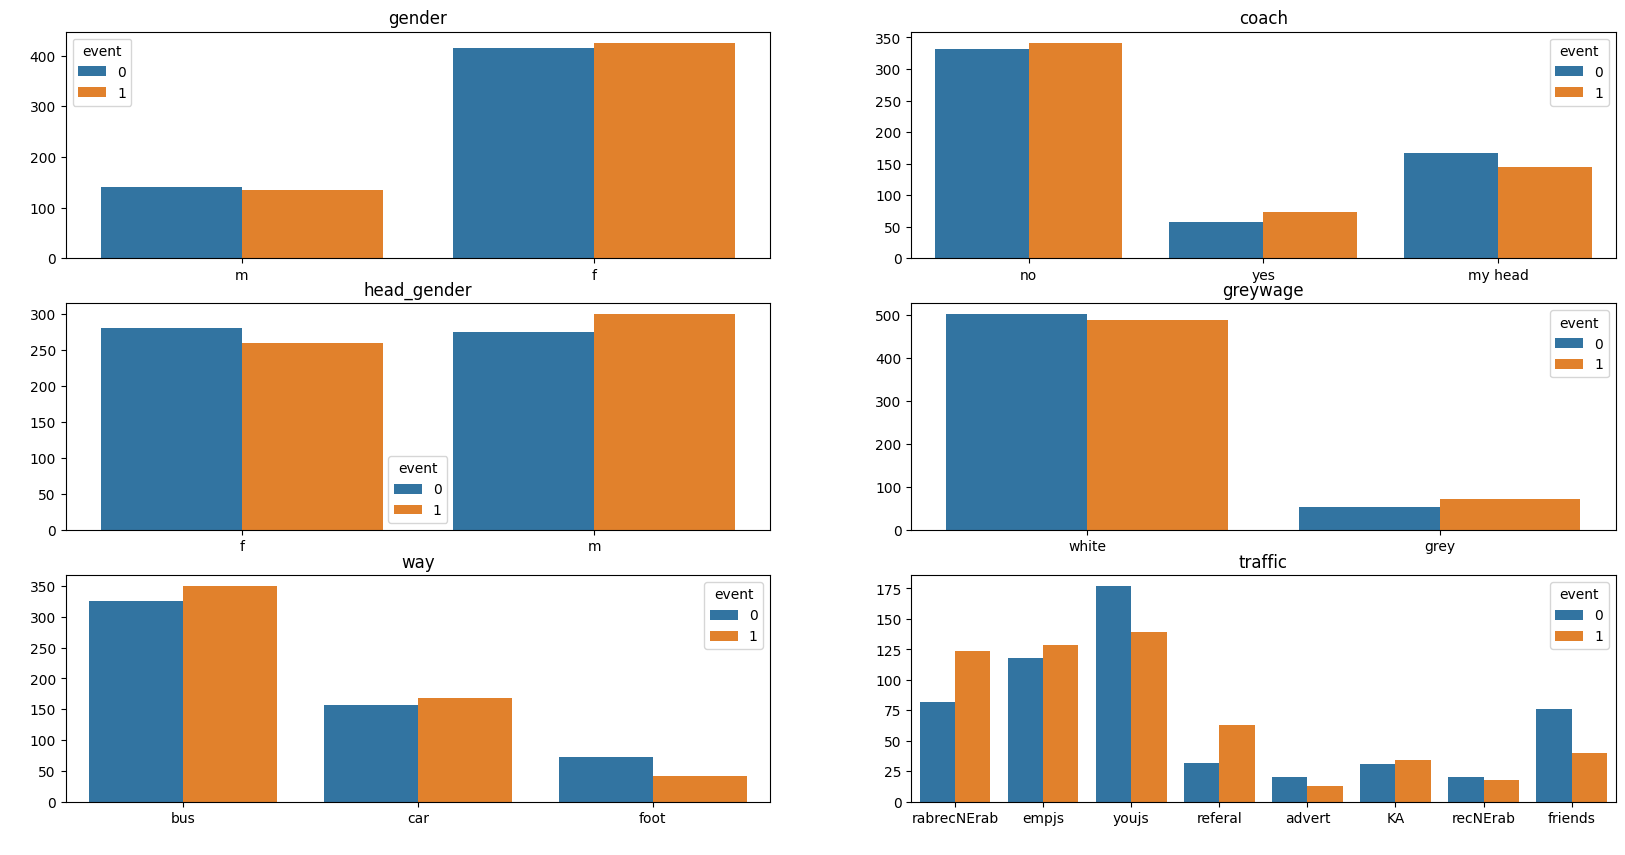

In [65]:
figure,axis = plt.subplots(ncols=2,nrows=3,figsize=(20,10))

g = sns.countplot(data=tor,x="gender",hue="event",ax=axis[0,0])
g.title.set_text("gender")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="coach",hue="event",ax=axis[0,1])
g.title.set_text("coach")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="head_gender",hue="event",ax=axis[1,0])
g.title.set_text("head_gender")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="greywage",hue="event",ax=axis[1,1])
g.title.set_text("greywage")
g.set(xlabel=" ")
g.set(ylabel=" ")

g = sns.countplot(data=tor,x="way",hue="event",ax=axis[2,0])
g.title.set_text("way")
g.set(xlabel=" ")
g.set(ylabel=" ")


g = sns.countplot(data=tor,x="traffic",hue="event",ax=axis[2,1])
g.title.set_text("traffic")
g.set(xlabel=" ")
g.set(ylabel=" ")

plt.show()


<Axes: xlabel='stag', ylabel='age'>

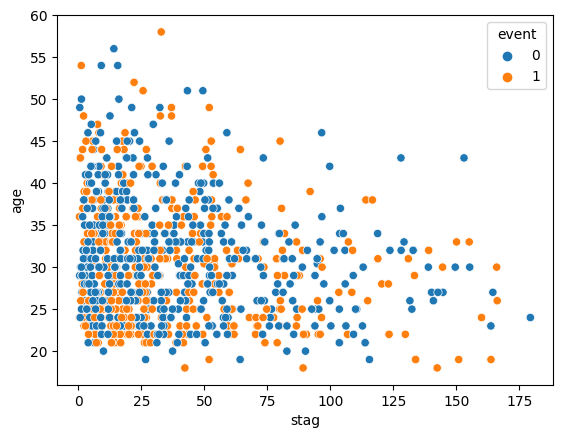

In [67]:
sns.scatterplot(data=tor,x="stag",y="age",hue= "event")

In [69]:
tor[:5]

stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      7.1      8.3  
2      4.8      8.3  
3      2.5      6.7  
4      7.1      3.7

In [40]:
new = tor[['gender','industry','profession','traffic','coach','head_gender']]
new[:2]

gender industry profession      traffic coach head_gender
0      m    Banks         HR  rabrecNErab    no           f
1      m    Banks         HR        empjs    no           m

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

## ***Labells Encoding***

In [49]:
encode = LabelEncoder()
encode

LabelEncoder()

In [51]:
tor.head()

stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      7.1      8.3  
2      4.8      8.3  
3      2.5      6.7  
4      7.1      3.7

In [53]:
tor.gender = encode.fit_transform(tor['gender'])
tor.industry = encode.fit_transform(tor['industry'])
tor.profession = encode.fit_transform(tor['profession'])
tor.traffic = encode.fit_transform(tor['traffic'])
tor.coach = encode.fit_transform(tor['coach'])
tor.head_gender = encode.fit_transform(tor['head_gender'])
tor.greywage = encode.fit_transform(tor['greywage'])
tor.way = encode.fit_transform(tor['way'])

In [54]:
tor.head()

stag  event  gender   age  industry  profession  traffic  coach  \
0   7.030801      1       1  35.0         2           6        4      1   
1  22.965092      1       1  33.0         2           6        2      1   
2  15.934292      1       0  35.0         8           6        4      1   
3  15.934292      1       0  35.0         8           6        4      1   
4   8.410678      1       1  32.0        10           2        7      2   

   head_gender  greywage  way  extraversion  independ  selfcontrol  anxiety  \
0            0         1    0           6.2       4.1          5.7      7.1   
1            1         1    0           6.2       4.1          5.7      7.1   
2            1         1    0           6.2       6.2          2.6      4.8   
3            1         1    0           5.4       7.6          4.9      2.5   
4            0         1    0           3.0       4.1          8.0      7.1   

   novator  
0      8.3  
1      8.3  
2      8.3  
3      6.7  
4      3.7

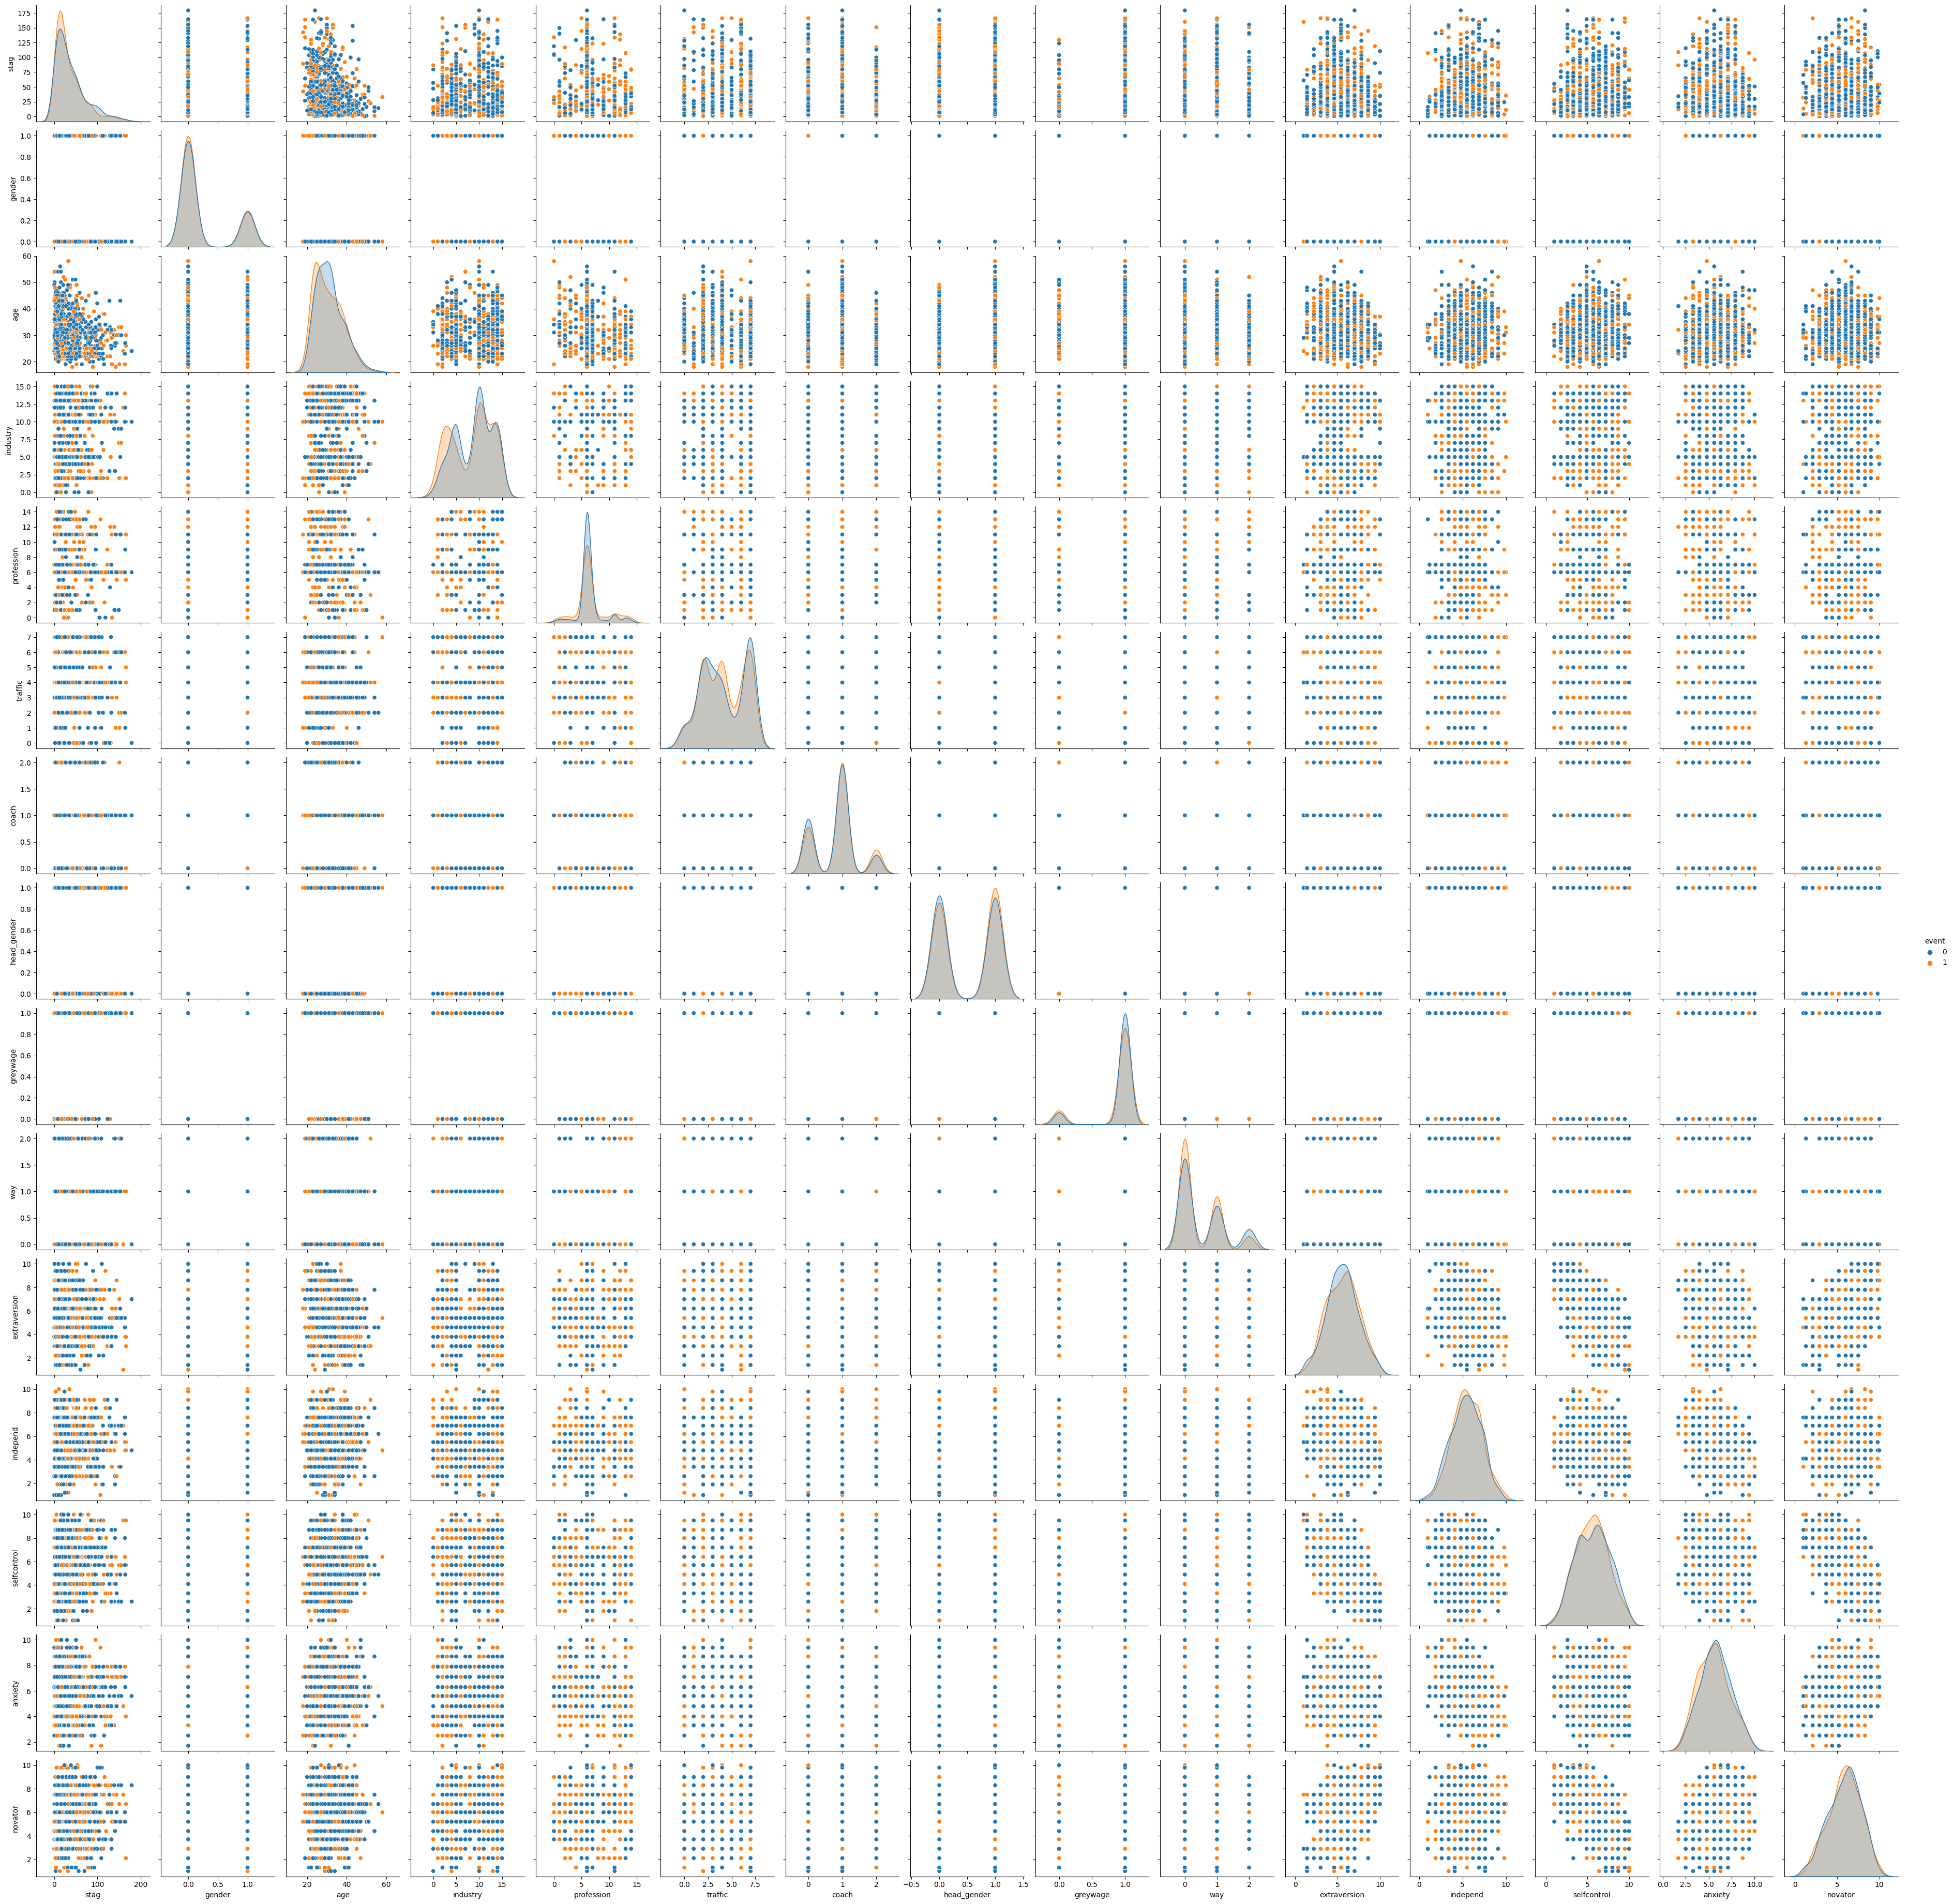

In [72]:
sns.pairplot(data=tor,hue="event")

<Axes: >

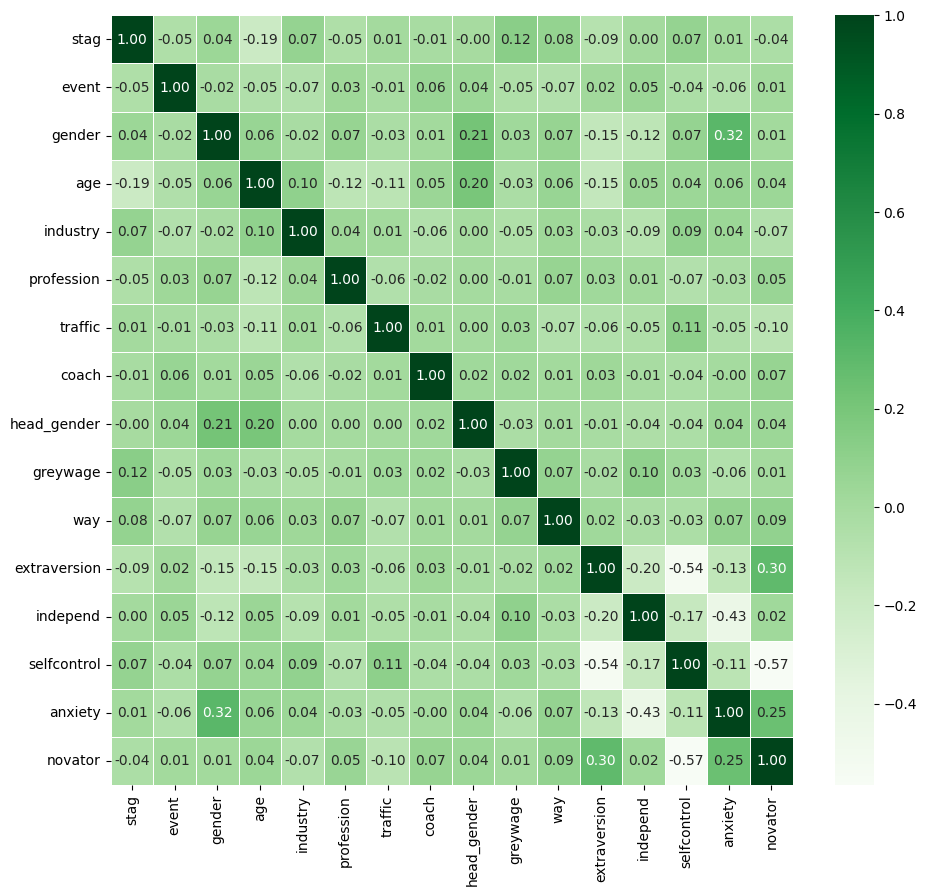

In [76]:
plt.figure(figsize=(11,10))
sns.heatmap(data=tor.corr(),annot=True,fmt=".2f",linewidth=0.5,linecolor="white",cmap="Greens")

In [56]:
tor.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

## ***Modeling***

In [55]:
model = LogisticRegression()
model

LogisticRegression()

In [57]:
X = tor[['stag', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator']]
y = tor['event']
display(X,y)

stag  gender   age  industry  profession  traffic  coach  \
0       7.030801       1  35.0         2           6        4      1   
1      22.965092       1  33.0         2           6        2      1   
2      15.934292       0  35.0         8           6        4      1   
3      15.934292       0  35.0         8           6        4      1   
4       8.410678       1  32.0        10           2        7      2   
...          ...     ...   ...       ...         ...      ...    ...   
1123    6.669405       0  27.0         2           6        7      1   
1124   10.611910       0  41.0         2           6        4      0   
1126  118.800821       0  34.0        12           0        0      1   
1127   49.412731       0  51.0         4           6        2      1   
1128   24.837782       0  29.0        10           6        7      1   

      head_gender  greywage  way  extraversion  independ  selfcontrol  \
0               0         1    0           6.2       4.1          5.7   
1               1         1    0           6.2       4.1          5.7   
2               1         1    0           6.2       6.2          2.6   
3               1         1    0           5.4       7.6          4.9   
4               0         1    0           3.0       4.1          8.0   
...           ...       ...  ...           ...       ...          ...   
1123            0         1    0           9.4       5.5          3.3   
1124            1         1    0           8.6       3.4          2.6   
1126            0         1    0           4.6       5.5          7.2   
1127            1         0    0           3.8       7.6          5.7   
1128            0         1    1           9.4       1.2          4.1   

      anxiety  novator  
0         7.1      8.3  
1         7.1      8.3  
2         4.8      8.3  
3         2.5      6.7  
4         7.1      3.7  
...       ...      ...  
1123      4.0      7.5  
1124      4.8      8.3  
1126      6.3      3.7  
1127      6.3      5.2  
1128      5.6      6.7  

[1116 rows x 15 columns]

0       1
1       1
2       1
3       1
4       1
       ..
1123    0
1124    0
1126    0
1127    0
1128    0
Name: event, Length: 1116, dtype: int64

## ***Data Splitting***
###### ***Use of stratify:-***
###### ***stratify is used to maintain training and testing data of y in proportion***
###### ***In this case we are predicting that 1 --> Employee with expereinced turnover and 0 --> employee with turnover did not occur. So, stratify helps like negative data will be more in training and less in testing***

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [70]:
model.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred = model.predict(x_test)
len(y_pred)

279

In [79]:
len(y_test)

279

In [71]:
model.score(x_train,y_train)

0.5400238948626045

### ***Performance Measures / Metrics / Reg cost Fun:***

In [81]:
# Accuracy:
accuracy_score(y_test,y_pred)

0.5663082437275986

In [88]:
confusion_matrix(y_test,y_pred)

array([[70, 69],
       [52, 88]])

<Axes: >

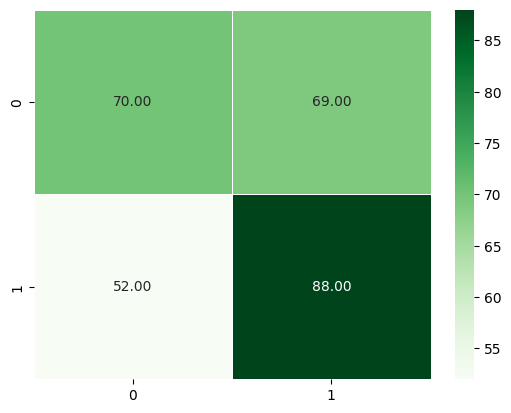

In [90]:
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt=".2f",linewidth=0.7,linecolor="white",cmap="Greens")
# In this case detecting the turnover occired or not for the employement
# As per prediction -->
# 0 --> 139 employee has is with turnover not occured
# 1 --> 140 employee with turnover occured
# Out of 139 machine predicts that 70 employee has turnover did not occured (True Negtaive)
# and remaining 69 has also not occurs but machine predict 69 employees expereinced with turnover (False Positive) --> Wrongly positive
# Out of 140 employee machine predicts that 88 persons has expereinced with turnover(True Positive)
# and remaining 52 actually they are experienced with turnover mahine predicts that 52 employees did not occurs turnover (False Negative) --> wrongly negative

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.54       139
           1       0.56      0.63      0.59       140

    accuracy                           0.57       279
   macro avg       0.57      0.57      0.56       279
weighted avg       0.57      0.57      0.56       279



In [84]:
precision_score(y_test,y_pred)

0.5605095541401274

In [85]:
recall_score(y_test,y_pred)

0.6285714285714286

In [87]:
f1_score(y_test,y_pred)

0.5925925925925926

In [92]:
log = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
log[:2]

Actual  Predicted
295       0          0
653       0          0

In [97]:
x_test.head()

stag  gender   age  industry  profession  traffic  coach  \
295   73.823409       0  26.0        10          13        7      1   
653  144.755647       0  27.0        14           6        6      1   
548   23.457906       0  29.0        10           6        7      0   
801   24.837782       0  34.0         5           6        3      1   
515  129.281314       1  33.0        14           4        5      0   

     head_gender  greywage  way  extraversion  independ  selfcontrol  anxiety  \
295            1         1    1          10.0       5.5          2.6      6.3   
653            0         1    1           5.4       9.1          3.3      4.8   
548            1         1    0           6.2       6.2          5.7      6.3   
801            1         1    0           5.4       4.1          3.3      7.9   
515            1         1    0           5.4       8.4          4.1      4.8   

     novator  
295      6.7  
653      6.0  
548      2.9  
801      7.5  
515      6.7

<Axes: >

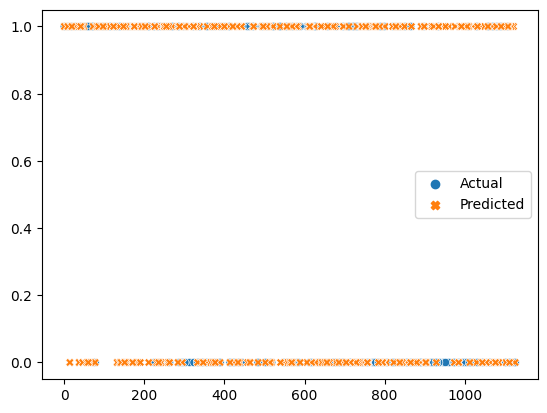

In [96]:
# Logistic regression plot:
sns.scatterplot(data=log)

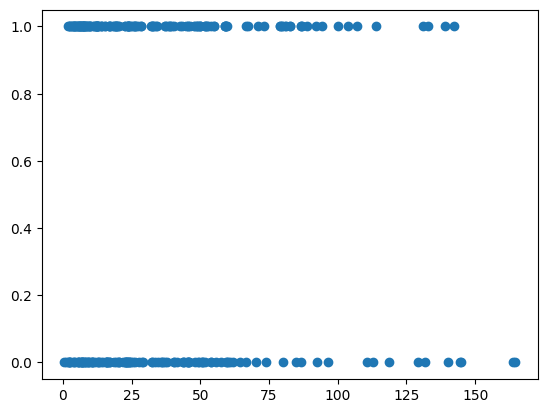

In [104]:
plt.scatter(x=x_test.stag,y=y_pred)